In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("df.csv", index_col=False)
df.columns

Index(['Unnamed: 0', '0', '1'], dtype='object')

In [3]:
df = df.drop(columns=["Unnamed: 0"])
df = df.rename(columns={
    "0": "nickname",
    "1": "follows"
})
df

,nickname,follows
0,@CathieDWood,"['@realMeetKevin', '@TeslaPodcast', '@Gfilche'..."
1,@4thFromOurStar,"['@NASAPersevere', '@FlatEarthOrg', '@MarkRobe..."
2,@BBCScienceNews,"['@BBC_Future', '@Vic_Gill', '@omitbdf', '@CSI..."
3,@TheStoicEmperor,"['@naval', '@orangebook_', '@nntaleb', '@paulg..."
4,@HardcoreHistory,"['@holland_tom', '@DBolelli', '@dcsandbrook', ..."
...,...,...
125,@DavidSacks,"['@Jason', '@micsolana', '@friedberg', '@theal..."
126,@tegmark,"['@demishassabis', '@bgreene', '@FLIxrisk', '@..."
127,@Twitter,"['@laswagna', '@antmans_oranges', '@itsme_ilia..."
128,@SciGuySpace,"['@Erdayastronaut', '@DJSnM', '@NASASpacefligh..."


In [4]:
df["follows"] = df["follows"].apply(eval)
df

,nickname,follows
0,@CathieDWood,"[@realMeetKevin, @TeslaPodcast, @Gfilche, @vin..."
1,@4thFromOurStar,"[@NASAPersevere, @FlatEarthOrg, @MarkRober, @n..."
2,@BBCScienceNews,"[@BBC_Future, @Vic_Gill, @omitbdf, @CSIR_IND, ..."
3,@TheStoicEmperor,"[@naval, @orangebook_, @nntaleb, @paulg, @Robe..."
4,@HardcoreHistory,"[@holland_tom, @DBolelli, @dcsandbrook, @Easte..."
...,...,...
125,@DavidSacks,"[@Jason, @micsolana, @friedberg, @theallinpod,..."
126,@tegmark,"[@demishassabis, @bgreene, @FLIxrisk, @johnpil..."
127,@Twitter,"[@laswagna, @antmans_oranges, @itsme_iliana, @..."
128,@SciGuySpace,"[@Erdayastronaut, @DJSnM, @NASASpaceflight, @t..."


In [5]:
follows_len = []
for index, row in df.iterrows():
    follows_len.append(len(row["follows"]))

In [6]:
print(max(follows_len))
print(len(follows_len))

100
130


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def make_graph(data):
    edges = []
    vertices = list(data["nickname"].values)
    for _, raw in data.iterrows():
        user = raw["nickname"]
        for follow_id in raw["follows"]:
            edges.append((user, follow_id))
            if follow_id not in vertices:
                vertices.append(follow_id)
    
    G = nx.Graph(directed=False)
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)
    return G, vertices, edges

def mask_graph(data):
    edges = []
    vertices = list(data["nickname"].values)
    for _, raw in data.iterrows():
        user = raw["nickname"]
        for follow_id in raw["follows"]:
            if follow_id in vertices:
                vertices.append(follow_id)
                edges.append((user, follow_id))
    
    G = nx.Graph(directed=False)
    G.add_nodes_from(vertices)
    G.add_edges_from(edges)
    return G, vertices, edges

In [10]:
edges = pd.read_csv("edges.csv")
vertices = pd.read_csv("vertices.csv")

In [11]:
edges

,first_vertex,second_vertex
0,1,131
1,1,132
2,1,133
3,1,134
4,1,135
...,...,...
12995,130,7694
12996,130,7695
12997,130,7696
12998,130,7697


In [17]:
all_vertices = list(vertices["name_of_v"].values)
no_dublicates_vertices = set(all_vertices)
assert len(all_vertices) == len(no_dublicates_vertices)

In [9]:
graph, vertices, edges = make_graph(df)

#### Graph analysis

In [16]:
connected_components = list(nx.connected_components(graph))
connected_components

[{0,
  '@Larakate',
  '@IlanaWitten',
  '@DecisionDeskHQ',
  '@ATCEMS',
  '@RGVaerialphotos',
  '@bailesy',
  '@fidjissimo',
  '@Rogozin',
  '@MaxCRoser',
  '@samteller',
  '@HighTechJoe',
  '@GeniusNFT',
  '@aminorjourney',
  '@Fwd_Party',
  '@uwhyperloop',
  '@ozekiland',
  '@BBCScienceNews',
  '@_hawko',
  '@HyperChangeTV',
  '@DavidWeiller',
  '@walterkirn',
  '@SiwickiHealthIT',
  '@LCNewsLine',
  '@tconrad',
  '@shmiga1',
  '@Jisaacso',
  '@ChrisEvans',
  '@PaperJamGames',
  '@HaleyThayer_',
  '@Marthalanefox',
  '@weekndvis',
  '@jacobGreif',
  '@ChemistryWorld',
  '@AkaashSingh',
  '@XLR',
  '@bgayle2',
  '@uw_icecube',
  '@BitFenix',
  '@SimonCohen85',
  '@AP4Liberty',
  '@kansasfest',
  '@Ravarora1',
  '@arvidguterstam',
  '@heasutherland',
  '@ben_roddy',
  '@Teslaconomics',
  '@HueyKnew_',
  '@esaoperations',
  '@mkives',
  '@KevinUrie',
  '@casciencecenter',
  '@austin_rief',
  '@IcelandSpace',
  '@oscarguindzberg',
  '@PandaExpress',
  '@Osinttechnical',
  '@_DeclanRice',

In [13]:
vertices_index = list((v + 1, k) for v, k in enumerate(vertices))
vertices_index

[(1, 'index'), (2, 'name_of_v')]

In [27]:
df_vertices = pd.DataFrame(data=vertices_index, columns=["index", "name_of_v"])
df_vertices.to_csv("vertices.csv", index=False)

In [36]:
mapper = {k: v + 1 for v, k in enumerate(vertices)}
edges_index = [(mapper[k[0]], mapper[k[1]]) for k in edges]
df_edges = pd.DataFrame(data=edges_index, columns=["first_vertex", "second_vertex"])
df_edges.to_csv("edges.csv", index=False)

In [22]:
graph = make_graph(df.head(1))

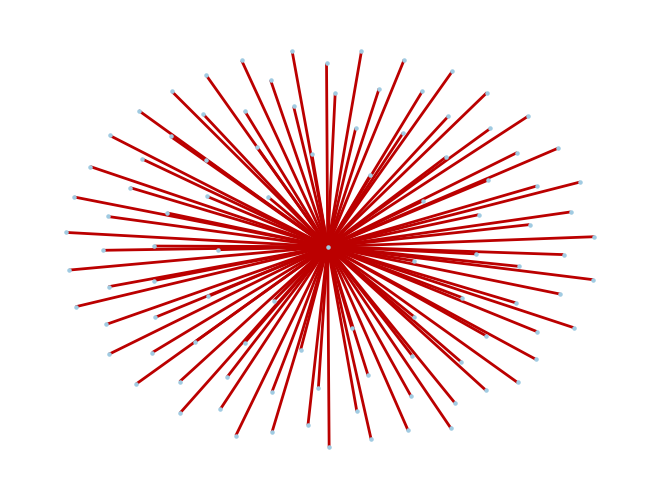

In [23]:
pos=nx.spring_layout(graph)
nx.draw(graph,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=False, node_size=5)

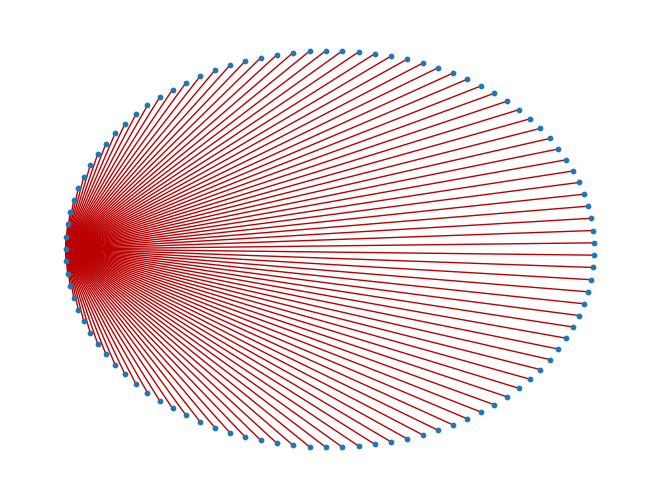

In [30]:
nx.draw_shell(graph, node_size=10, edge_color='#BB0000')

In [8]:
len(edges)

13000

In [32]:
G = nx.Graph(directed=False)
G.add_nodes_from(vertices)
G.add_edges_from(edges)

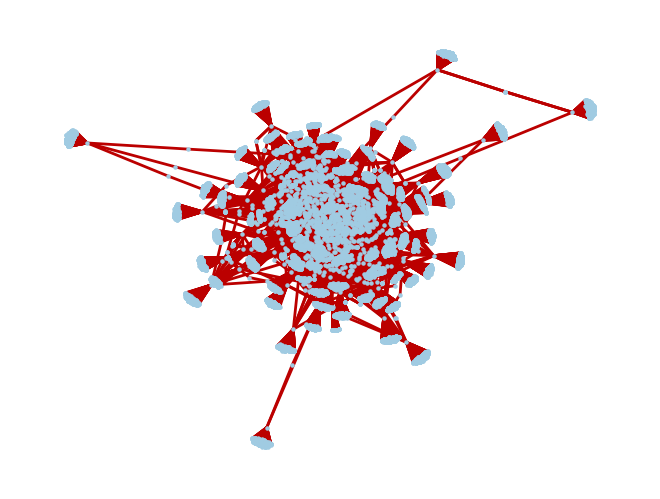

In [12]:
pos=nx.spring_layout(graph)
nx.draw(graph,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=False, node_size=5)
plt.show()

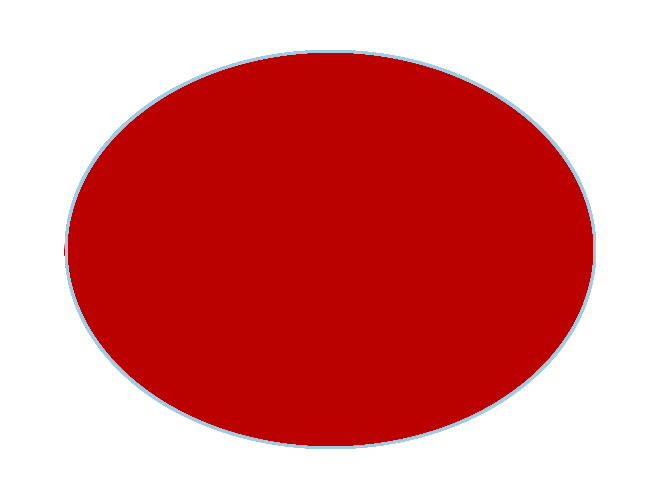

In [45]:
nx.draw_shell(G, node_size=1, node_color='#A0CBE2',edge_color='#BB0000')

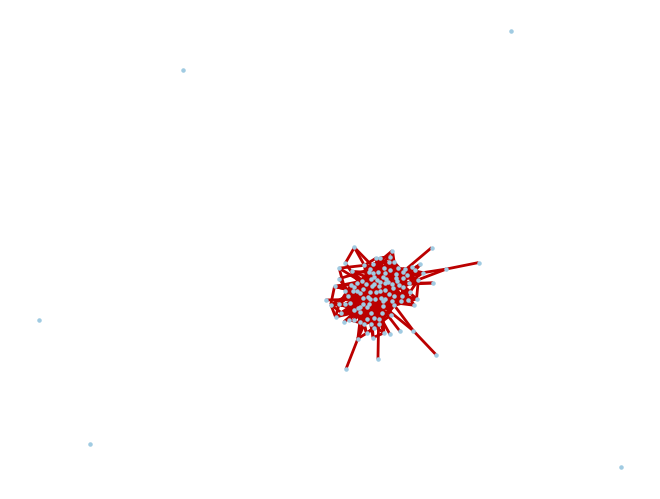

In [16]:
G = mask_graph(df)
pos=nx.spring_layout(G)
nx.draw(G,pos,node_color='#A0CBE2',edge_color='#BB0000',width=2,edge_cmap=plt.cm.Blues,with_labels=False, node_size=5)
plt.show()